In [445]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 18,5

df = pd.read_csv('Covid-19-World-Dataset.csv')
#This dataset contains the latest Covid-19 WORLD state-wise data in detail from 2/24/2020 to 6/29/2021. 
#https://www.kaggle.com/hussainaliarif/largest-covid19-world-dataset
df['datetime'] = pd.to_datetime(df.date)
df['month'] = df['datetime'].dt.to_period('M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99144 entries, 0 to 99143
Data columns (total 46 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   iso_code                             99144 non-null  object        
 1   continent                            94493 non-null  object        
 2   location                             99144 non-null  object        
 3   date                                 99144 non-null  object        
 4   total_cases                          95579 non-null  float64       
 5   new_cases                            95576 non-null  float64       
 6   total_deaths                         85461 non-null  float64       
 7   new_deaths                           85617 non-null  float64       
 8   reproduction_rate                    78887 non-null  float64       
 9   icu_patients                         9941 non-null   float64       
 10  hosp_patie

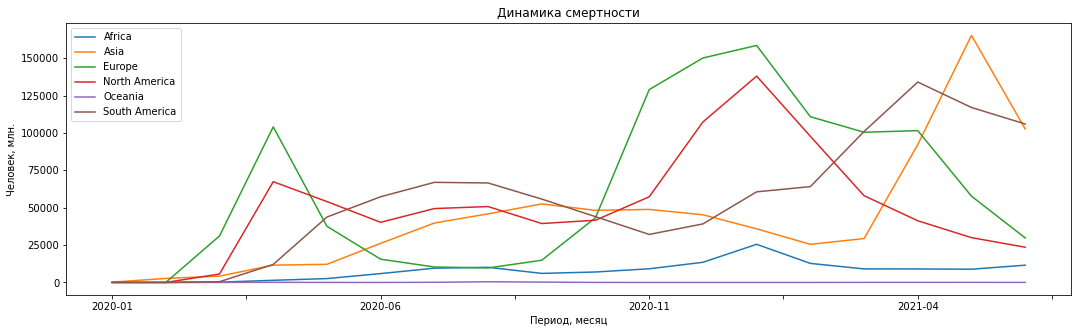

In [448]:
#количество смертей по месяцам в разрезе континентов
deaths_by_month = df[['new_deaths','month','continent']].groupby(['month', 'continent']).sum()
ddf = deaths_by_month.pivot_table(index=['month'], columns='continent', values='new_deaths')
ddf.index = ddf.index.strftime('%Y-%m')
ddf.plot(
    title='Динамика смертности', 
                             xlabel='Период, месяц', 
                             ylabel='Человек, млн.')
plt.legend(loc='upper left')

#перерыл интернет, не понял как изменить цену деления по шкале Х, чтобы все месяцы попадали, но не нашёл :( если скажете как,
#буду рад. Это самое удачное представление, что я пробовал. с plot.area пропадает Океания. поэтому оставил так
#по графику видно, что существуют пики смертности во второй половине декабря и в апреле 20 года

Text(0, 0.5, 'Процент инфицированных')

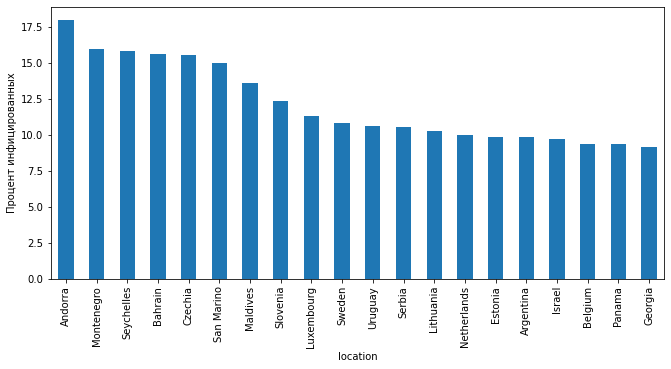

In [307]:
cases_by_country = df[['new_cases','location']].groupby(['location']).sum().sort_values(by=['new_cases'],ascending=False)
new_cases_by_country = cases_by_country.drop(cases_by_country.index[[0,1,2,3,4,5,6,10]])
population_by_country = df[['location','population']].groupby(['location']).mean().sort_values(by=['population'],ascending=False)
p = population_by_country['population'].dropna()
ppopulation_by_country = p.drop(p.index[[0,1,4,5,6,7,8]])
#ppopulation_by_country['population'].astype('int64')
pop_by_country = ppopulation_by_country.astype('int64').to_frame()
joined = new_cases_by_country.join(pop_by_country, how='inner')
joined['percent_of_infected'] = (joined['new_cases']/joined['population'] *100).round(2)
joined['percent_of_infected'].sort_values(ascending=False).head(20).plot(kind='bar').set_ylabel('Процент инфицированных')


#вообще во втором графике хотел построить гистограмму с наполнением (популяции к кол-ву зараженных, но гистограмма 
#получается очень ненаглядной)
#а в этом графике видно, что по количеству зараженных/население в процентном соотношении лидирует Андорра, монтенегро, но, 
#скорее всего эт освязано с низкой популяцией

<AxesSubplot:ylabel='percent_of_vaccination'>

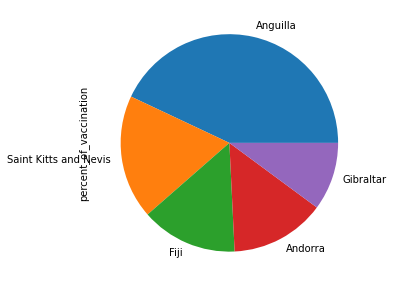

In [305]:
vac_status = df[['new_vaccinations','location', 'population']].dropna().groupby(['location']).sum() 
vac_status['population'] = vac_status['population'].astype('int64')
vac_status['new_vaccinations'] = vac_status['new_vaccinations'].astype('int64')
vac_status['percent_of_vaccination'] = (vac_status['new_vaccinations']/vac_status['population'])*100
#vac_status.dropna(subset=['percent_of_vaccination'], how='all', inplace=True)

top_vac = vac_status.sort_values(by='percent_of_vaccination', ascending=False).head(5)

top_vac['percent_of_vaccination'].plot(kind='pie')
#по данному графику видно, что в топ-5 по процентам вакцинированных лидирует Ангилья. Видимо из-за численности населения.

<AxesSubplot:xlabel='month', ylabel='location'>

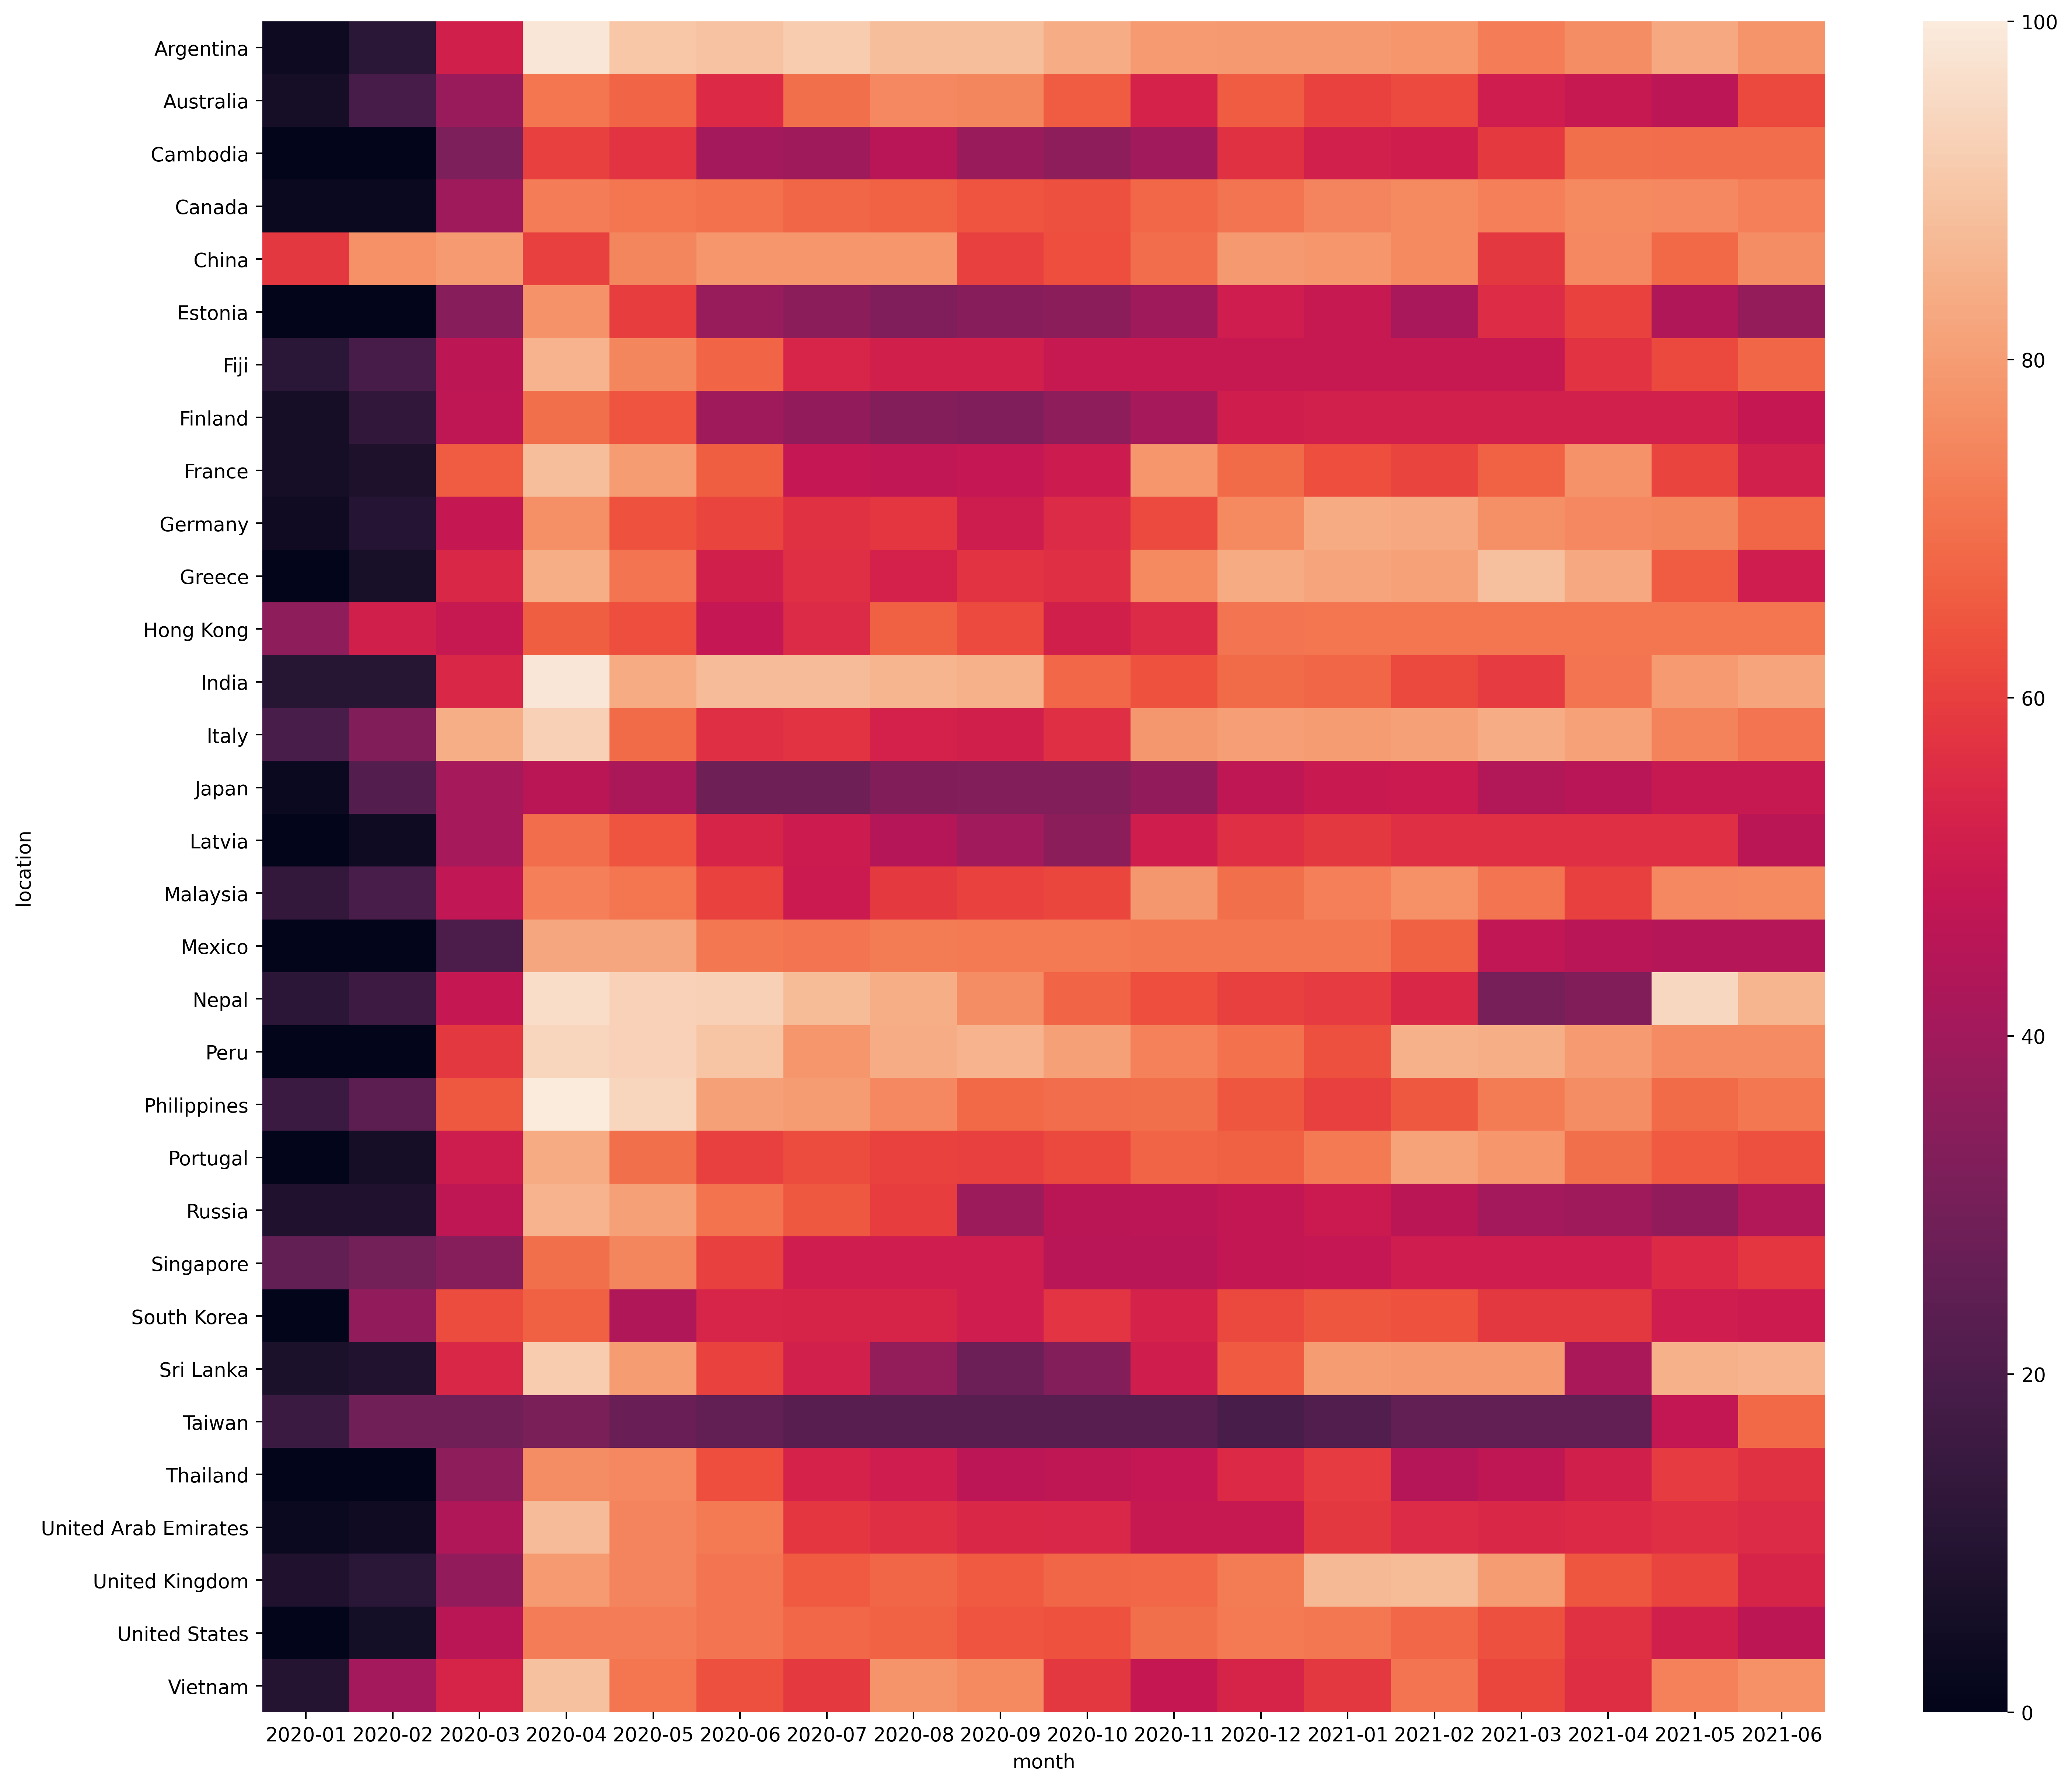

In [474]:

df = df[~df['location'].isin(['World', 'Asia', 'Africa', 'Europe', 'North America', 'European Union', 'South America'])]
str_df = df[[ 'month','location', 'stringency_index','population']].dropna().groupby(['location','month']).mean().sort_values(by=['population'], ascending = False)
ss = str_df.pivot_table(index='location', columns='month', values='stringency_index').dropna()
fig=plt.figure(figsize=(18, 16), dpi= 380, facecolor='w', edgecolor='k')
sns.heatmap(ss)
#по графику можно заметить, что в первые 2 месяца индекс строгости был минимальным практически во всех странах
#в тайване строгость минимальная на протяжении года